# Milestone 3: Populations simulation - further exploration

In [2]:
import random                  
import math
import numpy as np
from matplotlib import pyplot as plt

# What I tried

- Decreased species number to 3

## Setup
Here we define the values that will govern how the system behaves

In [75]:
# The populations vector represents the size of the population for each species
populations = np.array([20.0, 100.0, 300.0])
# The positions vector attempts to model how species would try to get closer/farther to/from their prey/predator
positions = np.linspace(-1, 1, 3)

# The predation table determines which species predates on which species and with which intensity
# It is antisymmetric, since if A predates B, then B is the prey of A
predation_table = np.zeros([3, 3])
# The values are filled for predators
predation_table[0, 1] = 0.003
predation_table[1, 2] = 0.003
predation_table[0, 2] = -0.003
# Here the table is made antisymmetric
predation_table -= predation_table.T

print(predation_table)

# The reproduction rate represents the baseline relative change in the species population
reproduction_rates = np.array([-0.05, 0, +0.05])

[[ 0.     0.003 -0.003]
 [-0.003  0.     0.003]
 [ 0.003 -0.003  0.   ]]


## Update function
Here we define the rules which the system follows and with which it evolves

In [76]:
# update simulates a step of time and returns the new populations and positions
def update(populations, positions, predation_table, reproduction_rates, dt=0.02):
    new_populations = populations
    new_positions = np.zeros(positions.shape)
    for i in range(0, populations.shape[0]):
        # The growth factor is basically the derivative of the population based on the Lotka-Volterra equations
        growth_factor = populations[i]*(reproduction_rates[i] + np.sum(populations*predation_table[i, :]))
        new_populations[i] += growth_factor*dt
        
        # The displacement determines essentially how species would want to move if they wanted to get closer to their prey
        # and farther from their predator
        accelleration = 0
        for j in range(0, populations.shape[0]):
            disp = positions[j] - positions[i];
            if j != i:
                if predation_table[i, j] > 0:
                    accelleration += populations[j]*disp/(abs(disp)**1.3)*predation_table[i, j]*0.3
                else:
                    accelleration += populations[j]*(1./disp)*predation_table[i, j]*0.3
        if accelleration > 10:
            accelleration = 10;
        if accelleration < -10:
            accelleration = -10;
        accelleration += -positions[i]
        new_positions[i] = positions[i] + accelleration*dt
    return (new_populations, new_positions)

## Simulation
Here we perform the simulation and show the results

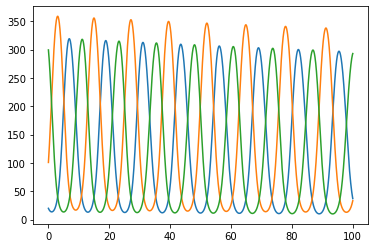

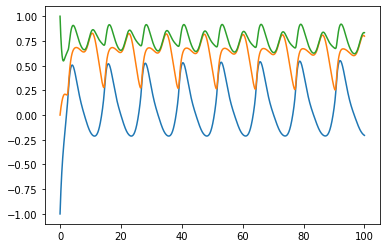

In [77]:
# Number of steps in the simulation
n_iter = 10000;
# Time step used
dt = 0.01;
# Arrays which keep track of the populations and positions over time
population_evolution = np.array([populations]);
positions_evolution = np.array([positions])
# Perform the simulation n_iter times
for i in range(1, n_iter):
    last_populations = population_evolution[-1, :]
    last_positions = positions_evolution[-1, :]
    (new_populations, new_positions) = update(last_populations, last_positions, predation_table, reproduction_rates, dt)
    population_evolution = np.append(population_evolution, [new_populations], axis=0)
    positions_evolution = np.append(positions_evolution, [new_positions], axis=0)

# Time intervals used for graphing
xs = [dt*x for x in range(0, n_iter)]
# Graph the populations against time
plt.plot(xs, population_evolution)
plt.show()
# Graph the positions against time
plt.plot(xs, positions_evolution)
plt.show()
